In [1]:
import pandas as pd
from scipy import stats

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
sns.set_context('paper')

In [6]:
df = pd.read_csv('../../data/summary/combined_q_and_behavior_subs_1-20.tsv', sep='\t')

### Modularity

In [7]:
q_df = df.drop([1,9]).melt(id_vars='subject', value_vars=['Rest_Q', 'r1_Q', 'r2_Q', 'r3_Q', 'r4_Q', 'r5_Q', 'r6_Q',
       'r7_Q', 'r8_Q', 'r9_Q', 'r10_Q'], value_name='Q', var_name='run')

In [8]:
q_df = q_df.replace(['Rest_Q', 'r1_Q', 'r2_Q', 'r3_Q', 'r4_Q', 'r5_Q', 'r6_Q',
       'r7_Q', 'r8_Q', 'r9_Q', 'r10_Q'], [str(i).zfill(2) for i in range(11)])

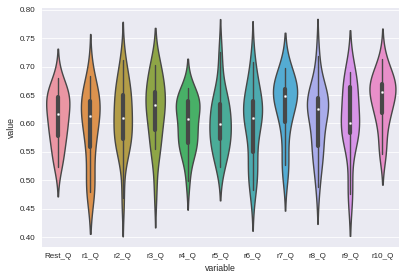

In [9]:
sns.violinplot('variable', 'value', data=df.loc[:,:'r10_Q'].melt('subject'), )

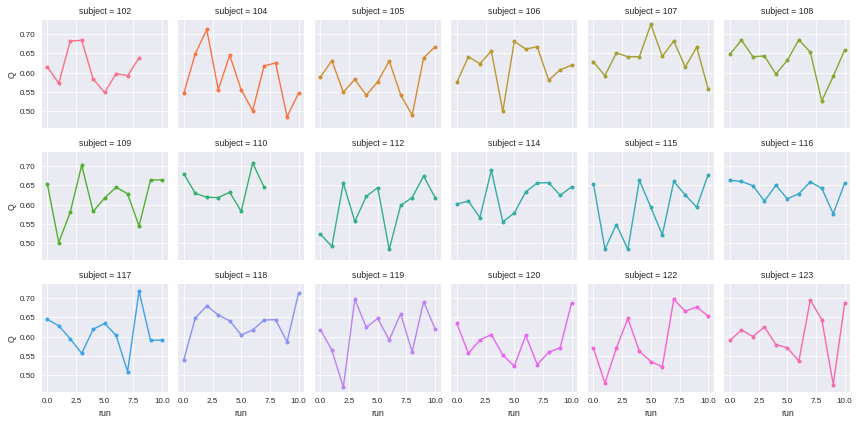

In [10]:
grid = sns.FacetGrid(q_df, col="subject", hue='subject', col_wrap=6, size=2)

grid.map(plt.plot, "run", "Q", marker="o", ms=4)

### Merge Modularity + Behavior DFs

In [11]:
prt_df = df.melt(id_vars='subject', value_vars=['r1_ProbeRT', 'r2_ProbeRT', 'r3_ProbeRT',
       'r4_ProbeRT', 'r5_ProbeRT', 'r6_ProbeRT', 'r7_ProbeRT', 'r8_ProbeRT',
       'r9_ProbeRT', 'r10_ProbeRT'],
                value_name='ProbeRT', var_name='run')

In [12]:
prt_df = prt_df.replace(['r1_ProbeRT', 'r2_ProbeRT', 'r3_ProbeRT',
       'r4_ProbeRT', 'r5_ProbeRT', 'r6_ProbeRT', 'r7_ProbeRT', 'r8_ProbeRT',
       'r9_ProbeRT', 'r10_ProbeRT'], [str(i).zfill(2) for i in range(1,11)])

In [13]:
q_prt_df = pd.merge(left=q_df.iloc[20:], right=prt_df, on=['subject','run'])

In [14]:
pa_df = df.melt(id_vars='subject', value_vars=['r1_ProbeAccuracy','r2_ProbeAccuracy','r3_ProbeAccuracy','r4_ProbeAccuracy',
                                               'r5_ProbeAccuracy','r6_ProbeAccuracy','r7_ProbeAccuracy','r8_ProbeAccuracy',
                                               'r9_ProbeAccuracy','r10_ProbeAccuracy'],
                value_name='ProbeAccuracy', var_name='run')

In [15]:
pa_df = pa_df.replace(['r1_ProbeAccuracy','r2_ProbeAccuracy','r3_ProbeAccuracy','r4_ProbeAccuracy',
                         'r5_ProbeAccuracy','r6_ProbeAccuracy','r7_ProbeAccuracy','r8_ProbeAccuracy',
                         'r9_ProbeAccuracy','r10_ProbeAccuracy'], [str(i).zfill(2) for i in range(1,11)])

In [16]:
q_prt_pa_df = pd.merge(left=q_prt_df, right=pa_df, on=['subject','run'])

In [17]:
sa_df = df.melt(id_vars='subject', value_vars=['r1_SearchAccuracy', 'r2_SearchAccuracy',
       'r3_SearchAccuracy', 'r4_SearchAccuracy', 'r5_SearchAccuracy',
       'r6_SearchAccuracy', 'r7_SearchAccuracy', 'r8_SearchAccuracy',
       'r9_SearchAccuracy', 'r10_SearchAccuracy'],
                value_name='SearchAccuracy', var_name='run')

In [18]:
sa_df = sa_df.replace(['r1_SearchAccuracy', 'r2_SearchAccuracy',
       'r3_SearchAccuracy', 'r4_SearchAccuracy', 'r5_SearchAccuracy',
       'r6_SearchAccuracy', 'r7_SearchAccuracy', 'r8_SearchAccuracy',
       'r9_SearchAccuracy', 'r10_SearchAccuracy'], [str(i).zfill(2) for i in range(1,11)])

In [19]:
q_prt_pa_sa_df = pd.merge(left=q_prt_pa_df, right=sa_df, on=['subject','run'])

In [20]:
srt_df = df.melt(id_vars='subject', value_vars=['r1_SearchRT', 'r2_SearchRT',
       'r3_SearchRT', 'r4_SearchRT', 'r5_SearchRT', 'r6_SearchRT',
       'r7_SearchRT', 'r8_SearchRT', 'r9_SearchRT', 'r10_SearchRT'],
                value_name='SearchRT', var_name='run')

In [21]:
srt_df = srt_df.replace(['r1_SearchRT', 'r2_SearchRT',
       'r3_SearchRT', 'r4_SearchRT', 'r5_SearchRT', 'r6_SearchRT',
       'r7_SearchRT', 'r8_SearchRT', 'r9_SearchRT', 'r10_SearchRT'], [str(i).zfill(2) for i in range(1,11)])

In [22]:
q_prt_pa_sa_srt_df = pd.merge(left=q_prt_pa_sa_df, right=srt_df, on=['subject','run'])

In [23]:
q_behav_df = q_prt_pa_sa_srt_df

### Probe RT

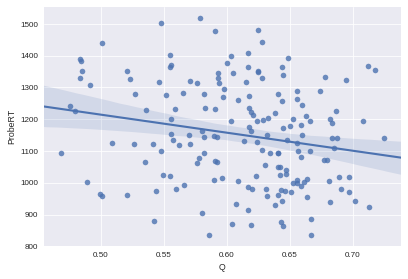

In [24]:
sns.regplot(x='Q', y='ProbeRT', data=q_behav_df)

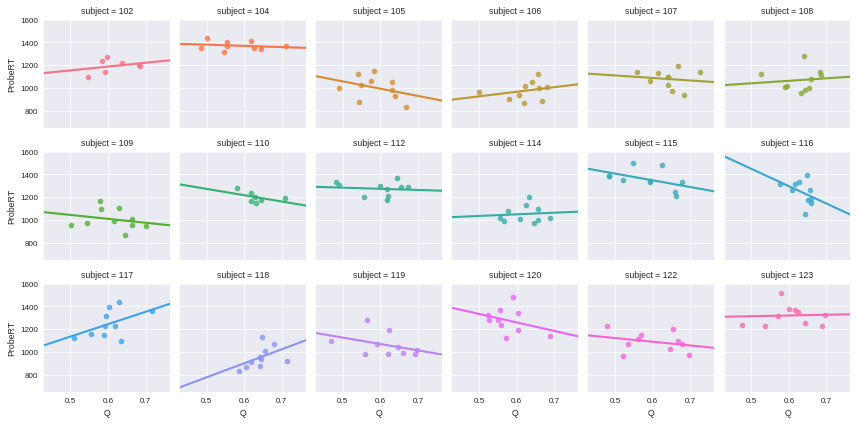

In [25]:
sns.lmplot(x="Q", y="ProbeRT", col="subject", hue="subject", data=q_behav_df,
           col_wrap=6, ci=None, size=2)

### Probe Accuracy

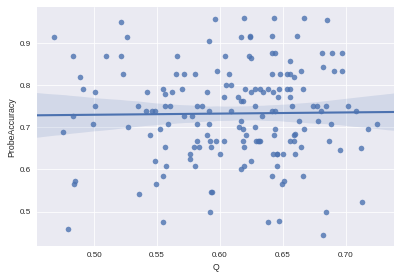

In [26]:
sns.regplot(x='Q', y='ProbeAccuracy', data=q_behav_df)

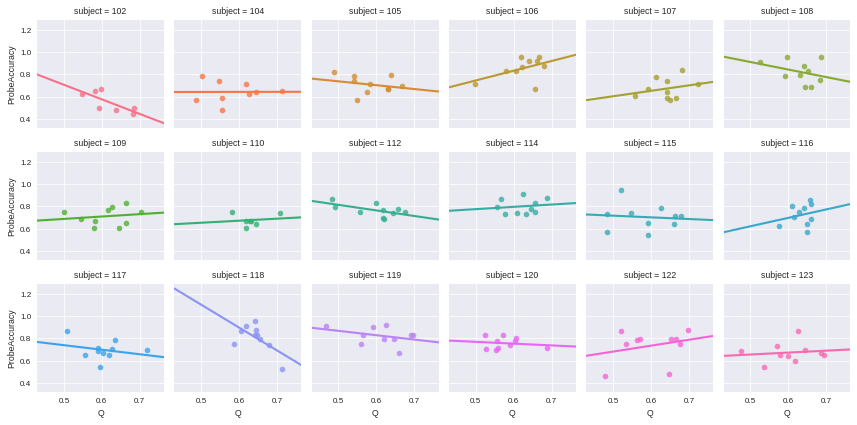

In [27]:
sns.lmplot(x="Q", y="ProbeAccuracy", col="subject", hue="subject", data=q_behav_df,
           col_wrap=6, ci=None, size=2)

### Search Accuracy

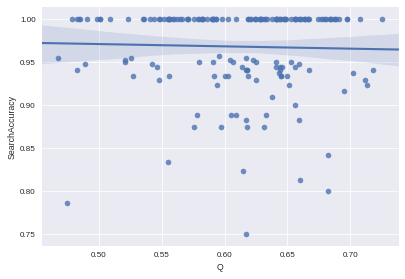

In [28]:
sns.regplot(x='Q', y='SearchAccuracy', data=q_behav_df)

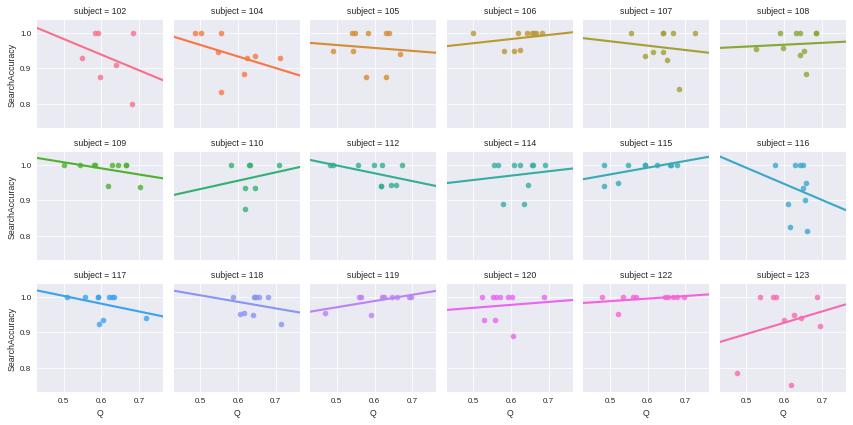

In [29]:
sns.lmplot(x="Q", y="SearchAccuracy", col="subject", hue="subject", data=q_behav_df,
           col_wrap=6, ci=None, size=2)

### Search RT

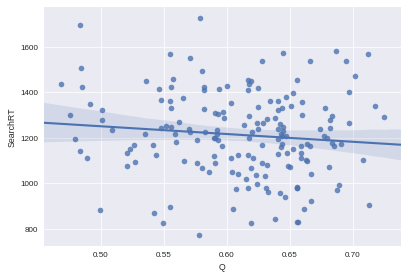

In [30]:
sns.regplot(x='Q', y='SearchRT', data=q_behav_df)

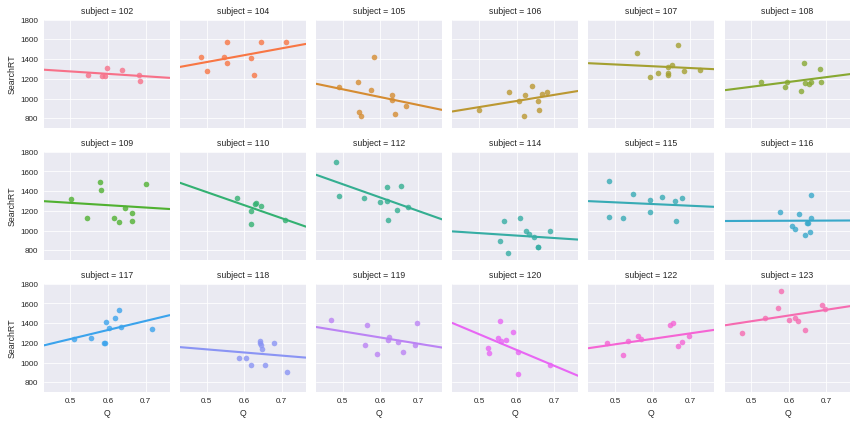

In [31]:
sns.lmplot(x="Q", y="SearchRT", col="subject", hue="subject", data=q_behav_df,
           col_wrap=6, ci=None, size=2)

### Resting Modularity vs. Overall Performance

Create a DF with resting Q and summary behavior measures.

In [197]:
restq_behav_summary_df = pd.concat([df.drop([1,9]).iloc[:,0:2],df.drop([1,9]).iloc[:,57:]], axis=1)

In [198]:
restq_behav_summary_df.columns

Index(['subject', 'Rest_Q', 'diff_easy_ProbeAccuracy',
       'diff_hard_ProbeAccuracy', 'same_easy_ProbeAccuracy',
       'same_hard_ProbeAccuracy', 'diff_easy_ProbeRT', 'diff_hard_ProbeRT',
       'same_easy_ProbeRT', 'same_hard_ProbeRT', 'diff_easy_SearchAccuracy',
       'diff_hard_SearchAccuracy', 'same_easy_SearchAccuracy',
       'same_hard_SearchAccuracy', 'diff_easy_SearchRT', 'diff_hard_SearchRT',
       'same_easy_SearchRT', 'same_hard_SearchRT'],
      dtype='object')

Add Beta Series modularity to the DF.

In [199]:
restq_behav_df = restq_behav_summary_df.melt(id_vars=['subject', 'Rest_Q',],
                                             value_vars=['diff_easy_ProbeAccuracy','diff_hard_ProbeAccuracy',
                                            'same_easy_ProbeAccuracy','same_hard_ProbeAccuracy',
                                            'diff_easy_ProbeRT', 'diff_hard_ProbeRT','same_easy_ProbeRT',
                                            'same_hard_ProbeRT', 'diff_easy_SearchAccuracy','diff_hard_SearchAccuracy',
                                            'same_easy_SearchAccuracy','same_hard_SearchAccuracy', 'diff_easy_SearchRT',
                                            'diff_hard_SearchRT','same_easy_SearchRT', 'same_hard_SearchRT'], value_name='value', var_name='b_var')

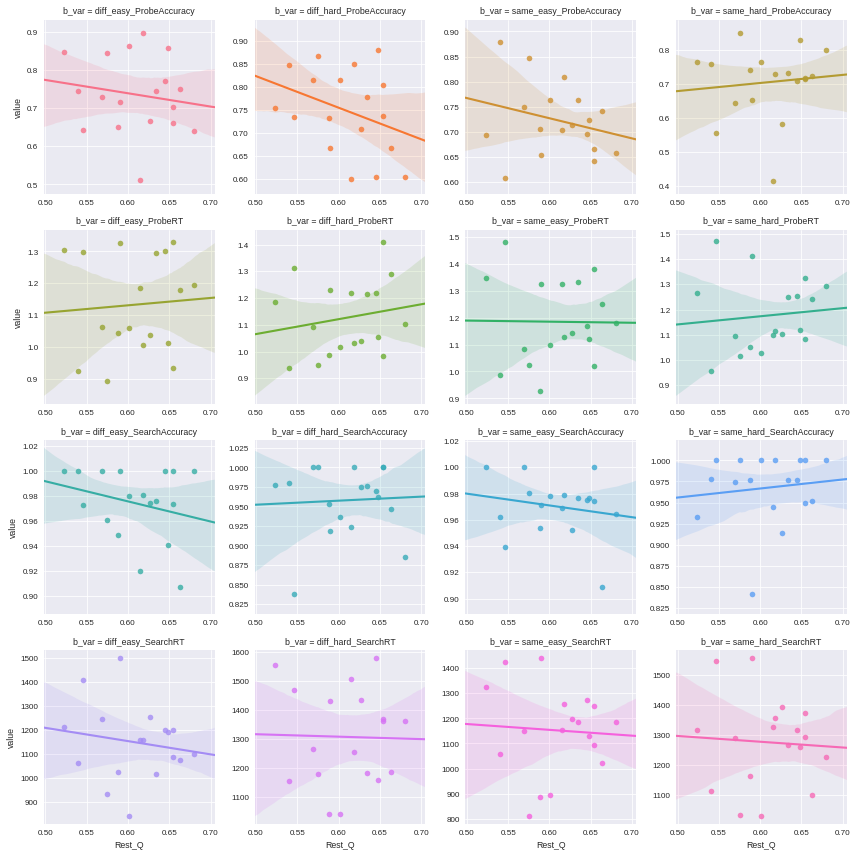

In [200]:
sns.lmplot(x="Rest_Q", y="value", col="b_var", hue="b_var", data=restq_behav_df,
           col_wrap=4, ci=95, size=3, sharey=False, sharex=False)

## Beta Series Connectivity

In [403]:
betaq_behav_df = pd.concat([df.iloc[:,0:2],df.iloc[:,57:]], axis=1)

In [404]:
betaq_behav_df = betaq_behav_df.set_index('subject')

In [405]:
subject_list_file = '/home/despoB/DistractWM/code/fmriprep/sge/subject_list.txt'

In [406]:
import numpy as np
import os

In [407]:
subject_list = np.loadtxt(subject_list_file, dtype='int')

In [408]:
conditions = [('cond1','low_easy_BetaQ'), ('cond2','low_hard_BetaQ'),
              ('cond3','high_easy_BetaQ'), ('cond4', 'high_hard_BetaQ'),
              ('cond5','face_low_easy_BetaQ'), ('cond6','face_low_hard_BetaQ'),
              ('cond7','face_high_easy_BetaQ'), ('cond8', 'face_high_hard_BetaQ'),
              ('cond9','house_low_easy_BetaQ'), ('cond10','house_low_hard_BetaQ'),
              ('cond11','house_high_easy_BetaQ'), ('cond12', 'house_high_hard_BetaQ')]

In [409]:
q_file_fpt = '/home/despoB/DistractWM/data/derivatives/custom/sub-{0}/func/alg-Louvain_thresh-None_gamma-1.0_graphdata/sub-{0}_task-DistractWM_contrast-{1}_space-MNI152Lin2009Asym_atlas-BNA_ModularityQ.txt'

In [410]:
for condition in conditions:
    betaq_behav_df[condition[1]] = np.NaN
    for sub_id in subject_list:
        if (sub_id == 113):
            pass
        elif (sub_id == 121):
            pass
        else:
            q_file = q_file_fpt.format(str(sub_id), condition[0])
            if os.path.exists(q_file):
                q_val = np.loadtxt(q_file, dtype='float')
                betaq_behav_df.loc[sub_id,condition[1]] = q_val

In [411]:
betaq_behav_df = betaq_behav_df.reset_index()

In [412]:
betaq_behav_df = betaq_behav_df.drop([1,9])

In [413]:
sns.set_context('notebook')

### Combined Conditions

In [414]:
betaq_molten_combined = betaq_behav_df.melt(id_vars='subject', 
                                   value_vars=['low_easy_BetaQ','low_hard_BetaQ',
                                               'high_easy_BetaQ','high_hard_BetaQ'],
                                            var_name='Condition', value_name='BetaQ')

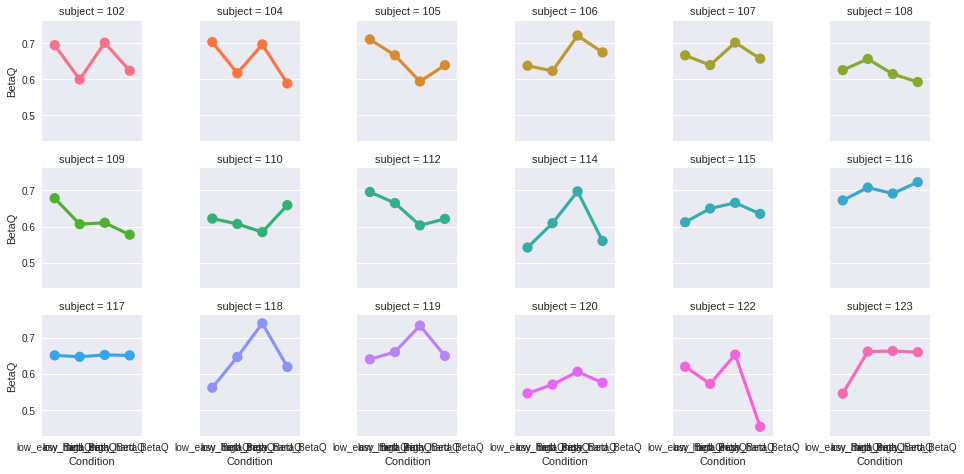

In [415]:
grid = sns.FacetGrid(betaq_molten_combined, col="subject", hue='subject', col_wrap=6, size=2.25)

grid.map(sns.pointplot, "Condition", "BetaQ",)

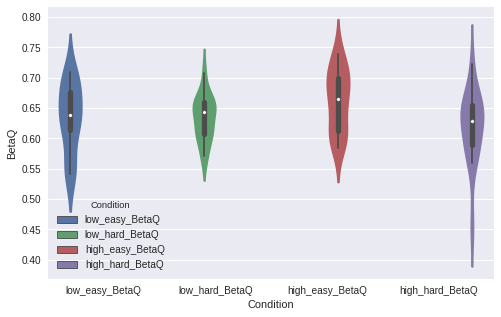

In [416]:
fig, ax = plt.subplots(figsize=(8,5))
sns.violinplot(x='Condition', y='BetaQ', hue='Condition', data=betaq_molten_combined, ax=ax)

### Face Conditions

In [417]:
betaq_molten_faces = betaq_behav_df.melt(id_vars='subject', 
                                   value_vars=['face_low_easy_BetaQ','face_low_hard_BetaQ',
                                               'face_high_easy_BetaQ','face_high_hard_BetaQ',],
                                            var_name='Condition', value_name='BetaQ')

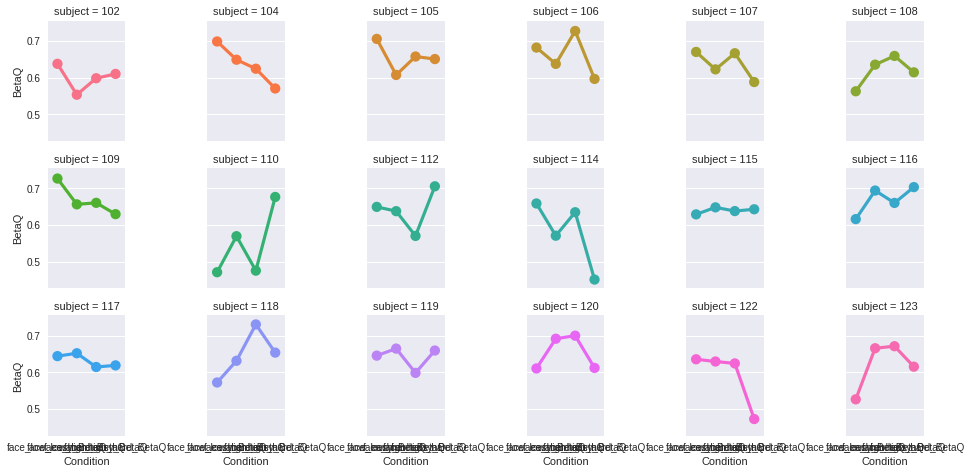

In [419]:
grid = sns.FacetGrid(betaq_molten_faces, col="subject", hue='subject', col_wrap=6, size=2.25)

grid.map(sns.pointplot, "Condition", "BetaQ")

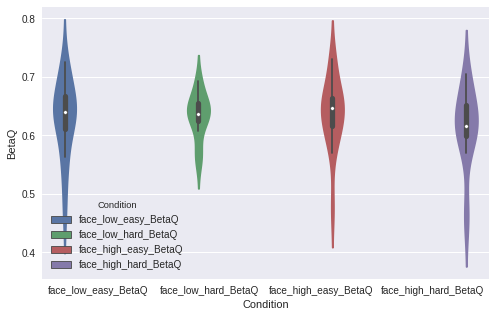

In [420]:
fig, ax = plt.subplots(figsize=(8,5))
sns.violinplot(x='Condition', y='BetaQ', hue='Condition', data=betaq_molten_faces, ax=ax)

### House Conditions

In [421]:
betaq_molten_houses = betaq_behav_df.melt(id_vars='subject', 
                                   value_vars=['house_low_easy_BetaQ','house_low_hard_BetaQ',
                                               'house_high_easy_BetaQ','house_high_hard_BetaQ',],
                                            var_name='Condition', value_name='BetaQ')

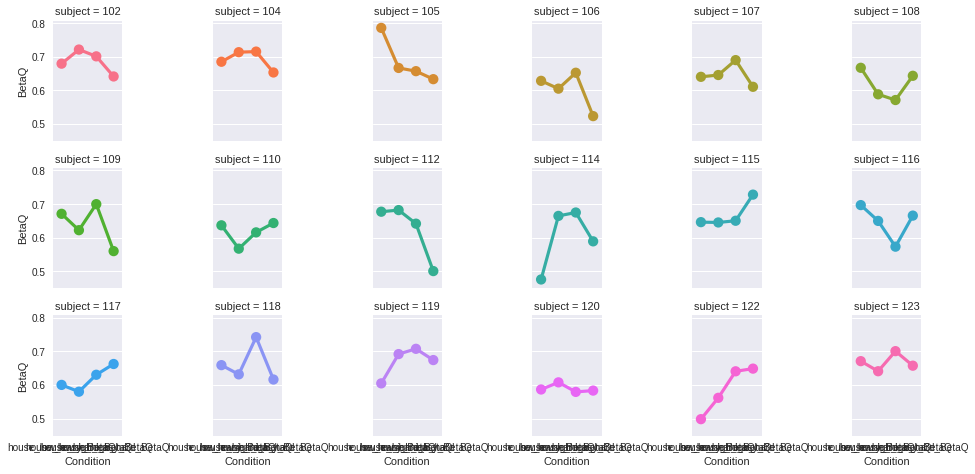

In [422]:
grid = sns.FacetGrid(betaq_molten_houses, col="subject", hue='subject', col_wrap=6, size=2.25)

grid.map(sns.pointplot, "Condition", "BetaQ")

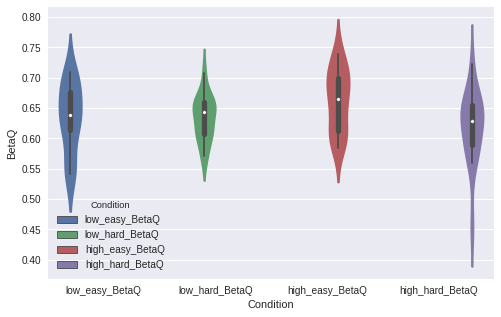

In [423]:
fig, ax = plt.subplots(figsize=(8,5))
sns.violinplot(x='Condition', y='BetaQ', hue='Condition', data=betaq_molten_combined, ax=ax)